# ML Spotify Dataset exploration

## Import Libraries

In [40]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Exploring 'data.csv'

In [41]:
# all data files paths
DATA_PATH =             Path("data/data.csv")
DATA_BY_ARTIST_PATH =   Path("data/data_by_artist.csv")
DATA_BY_GENRES_PATH =   Path("data/data_by_genres.csv")
DATA_BY_YEAR_PATH =     Path("data/data_by_year.csv")
DATA_W_GENRES_PATH =    Path("data/data_w_genres.csv")

In [42]:
# load file to dataframe
df = pd.read_csv(DATA_PATH)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [44]:
# dropping rows with missing values and dropping identifier columns
df = df.dropna()
cols_to_drop = ["id", "artists", "name"]
df = df.drop(columns=cols_to_drop, errors="ignore")
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,1921,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,1921,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,1921,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,1921,0.0380,101.665


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  popularity        170653 non-null  int64  
 13  release_date      170653 non-null  object 
 14  speechiness       170653 non-null  float64
 15  tempo             170653 non-null  float64
dtypes: float64(9), int64

no missing nas

In [46]:
popularity_threshold = 70
hit_song_count = (df["popularity"] > popularity_threshold).sum()
print(f"total number of songs: ", len(df))
print(f"number of songs with pop over {popularity_threshold}: ", hit_song_count)
print(f"percentage of songs with pop over {popularity_threshold}: ", hit_song_count / len(df) * 100)

total number of songs:  170653
number of songs with pop over 70:  4265
percentage of songs with pop over 70:  2.4992235706374926


<Axes: >

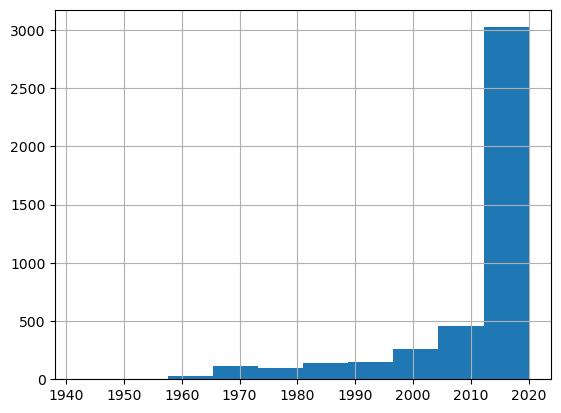

In [47]:
# checking year of hit songs
hit_songs = df[df["popularity"] > popularity_threshold]
hit_songs["year"].hist()

In [48]:
# creating binary target column 'hit'
df["hit"] = (df["popularity"] >= popularity_threshold).astype(int)
# getting hit value_counts
df["hit"].value_counts(normalize=True)

hit
0    0.970613
1    0.029387
Name: proportion, dtype: float64

In [49]:
df.isnull().sum().sort_values(ascending=False)

valence             0
liveness            0
tempo               0
speechiness         0
release_date        0
popularity          0
mode                0
loudness            0
key                 0
year                0
instrumentalness    0
explicit            0
energy              0
duration_ms         0
danceability        0
acousticness        0
hit                 0
dtype: int64

In [50]:
df["year"].describe()

count    170653.000000
mean       1976.787241
std          25.917853
min        1921.000000
25%        1956.000000
50%        1977.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

In [51]:
df["hit"].value_counts()
df["hit"].value_counts(normalize=True) * 100

hit
0    97.061288
1     2.938712
Name: proportion, dtype: float64

In [52]:
df["year"].value_counts().sort_index().head()
df["year"].value_counts().sort_index().tail()

year
2016    1797
2017    1992
2018    2103
2019    1949
2020    2030
Name: count, dtype: int64

<Axes: title={'center': 'Hit Rate Over Time'}, xlabel='year'>

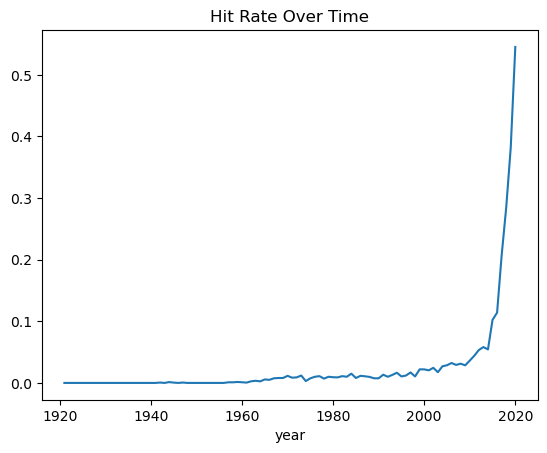

In [53]:
df.groupby("year")["hit"].mean().plot(
    title="Hit Rate Over Time"
)